In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df=pd.read_csv("health insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 4 columns are numerical

-->age
-->bmi
-->children
-->charges

There are 3 categorical columns

-->sex
-->smoker
-->region



In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


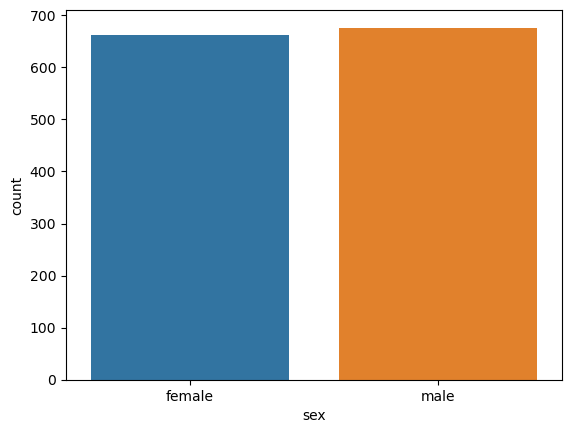

In [12]:
# univariant analysis of SEX
sns.countplot(x='sex',data=df)
plt.show()

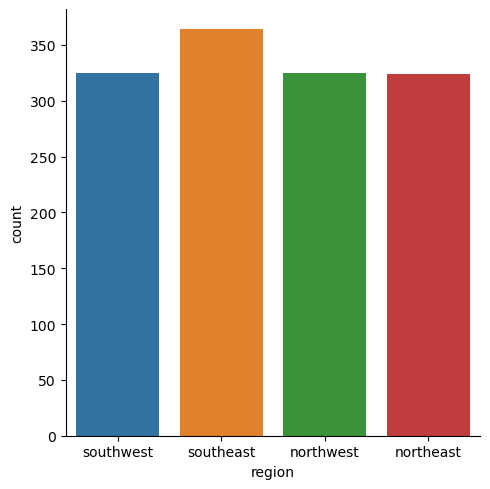

In [13]:
# Region distribution
sns.catplot(x='region',data=df,kind='count')
plt.show()

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


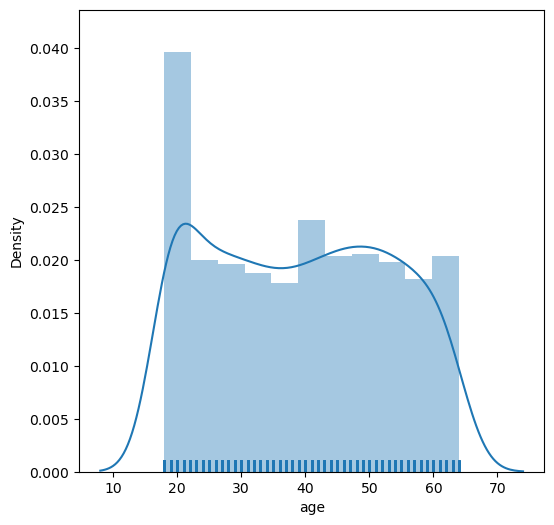

In [14]:
# Age distribution using distplot
plt.figure(figsize=(6,6))
sns.distplot(df['age'],kde=True,rug=True)
plt.show()

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

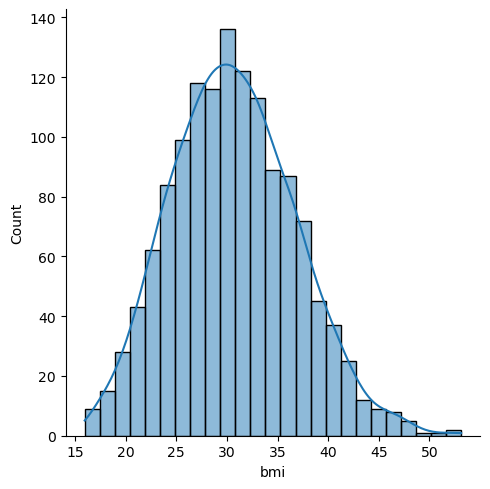

In [16]:
# distribution of BMI
sns.displot(df['bmi'],kde=True)
plt.show()

Normal BMI range=18.5 to 24.9

if bmi is lower than '18.5' the person is 'underweight' and if bmi is greater than '24.9' the person is 'overweight'

there are lot of person are overweight

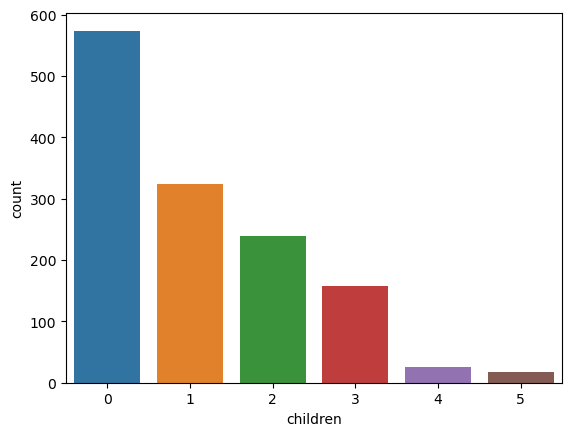

In [17]:
# No. of children distribution
sns.countplot(x='children',data=df)
plt.show()

In [18]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

574--> people has no chlidren,  324-->people has 1 children,  240-->people has 2 children,  157-->people has 3 children, 
25-->people has 4 children,   18--> peeople has only 5 children

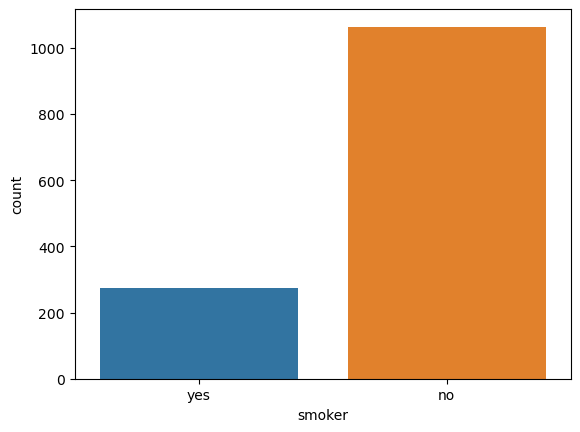

In [19]:
# smoker distribution
sns.countplot(x='smoker',data=df)
plt.show()

In [20]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

from the above graph
--->>274 people are smoker

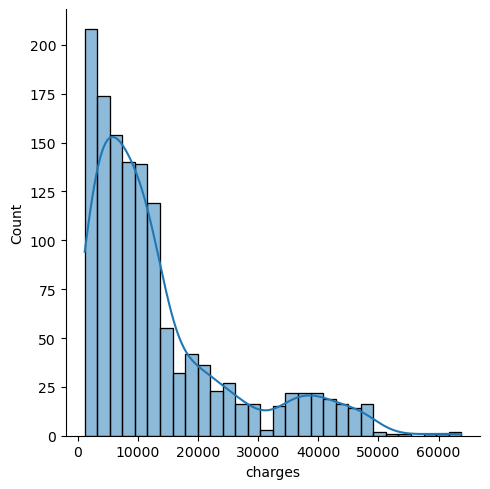

In [24]:
#charges distribution
sns.displot(df['charges'],kde=True)
plt.show()

In [25]:
#checking correlation
df_corr=df.corr()
df_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

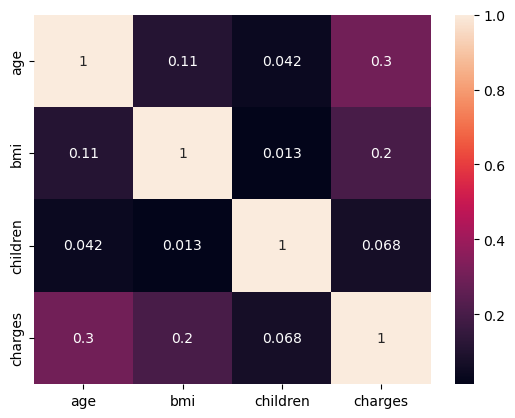

In [26]:
sns.heatmap(df_corr,annot=True)

In [27]:
df.corr()['charges'].sort_values

<bound method Series.sort_values of age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64>

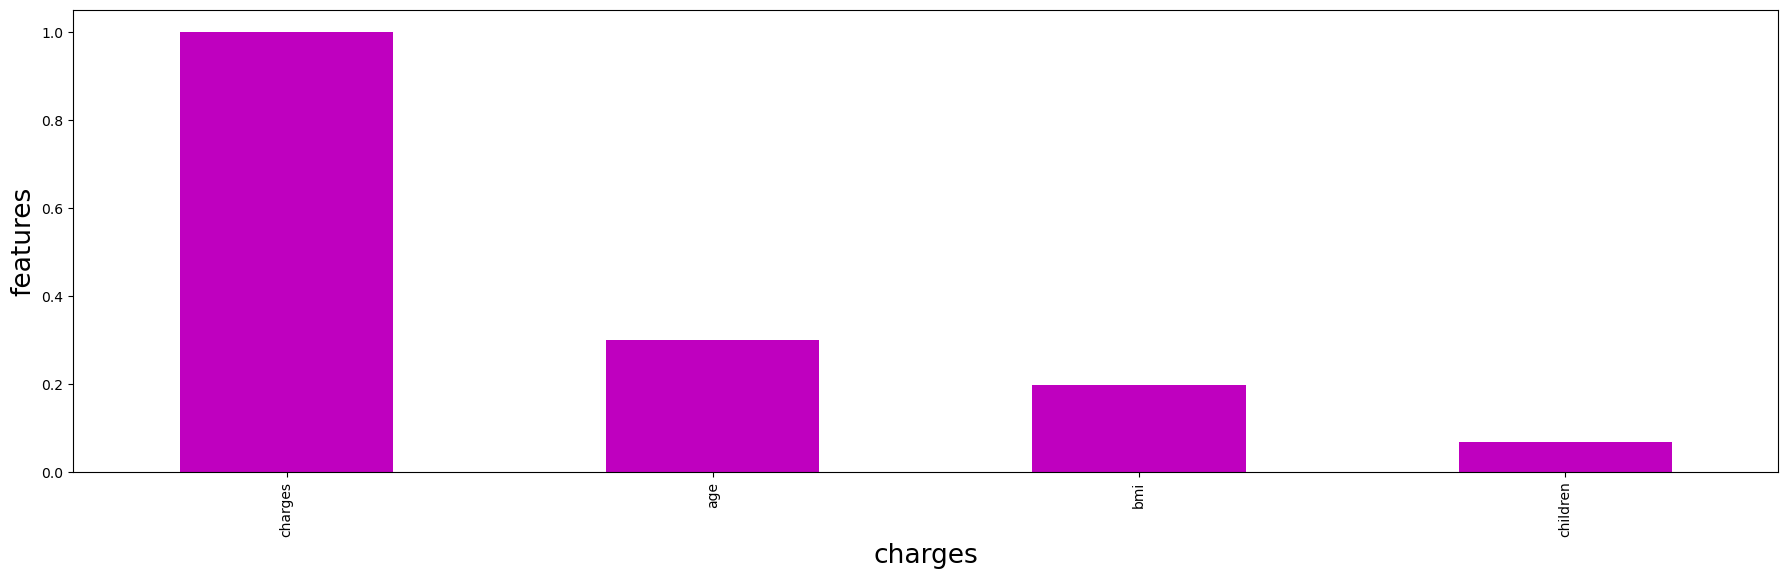

In [28]:
plt.figure(figsize=(22,6))
df.corr()['charges'].sort_values(ascending=False).plot(kind='bar',color='m')
plt.xlabel('charges',fontsize=19)
plt.ylabel('features',fontsize=19)
plt.show()

there are positively correlated with charges

In [29]:
df.skew()

C:\Users\A\AppData\Local\Temp\ipykernel_7040\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

-0.5 to + 0.5 the distribution of the values is almost symetrical

if its between 0.5 to 1 the data is positivelt skewed or skewness is moderate 

but if the skewness is lower than -1 means highly negatively skewed and if greater than +1 means highly positively skewed



In [30]:
from scipy import stats
from scipy.stats import boxcox

In [31]:
# removing skewness
df['charges']=boxcox(df['charges'],0)


In [32]:
df.skew()

C:\Users\A\AppData\Local\Temp\ipykernel_7040\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age         0.055673
bmi         0.284047
children    0.938380
charges    -0.090098
dtype: float64

now data is symmetric

In [33]:
# LabelEncoding
#sex
#smoker
#region
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [34]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.453302
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197
5,31,0,25.740,0,0,2,8.231275
6,46,0,33.440,1,0,2,9.016827
7,37,0,27.740,3,0,1,8.893093
8,37,1,29.830,2,0,0,8.765054
9,60,0,25.840,0,0,1,10.272397


we can see all categorical columns are converted in numerical col

df['sex']-->'0' for 'female' and --> '1' for 'male'

df['smoker']-->'0' for 'no' and --> '1' for 'yes'

df['region']--> '0' for 'northeast',-->'1' for 'northwest',-->'2' for 'southeast' and --> '3' for 'southwest' 


In [35]:
#Removing Outliers
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.691394
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,1.790020
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.759500
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.978513
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.912181
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.184949
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,1.522799
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,1.852106
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,1.625129


In [37]:
threshold=3
print(np.where(z>3))

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
        932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
      dtype=int64), array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
      dtype=int64))


In [38]:
df=df[(z<3).all(axis=1)]
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.453302
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,9.268661
1334,18,0,31.920,0,0,0,7.698927
1335,18,0,36.850,0,0,2,7.396233
1336,21,0,25.800,0,0,3,7.604867


In [39]:
# split the data into x and y
x=df.drop(['charges'],axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [40]:
y=df['charges']
y

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1316, dtype: float64

In [41]:
# scaling
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [42]:
x=st.fit_transform(x)
x

array([[-1.4414442 , -1.00609762, -0.45376763, -0.92823448,  1.95914147,
         1.35208943],
       [-1.5125093 ,  0.99393934,  0.52723912, -0.03853559, -0.51042766,
         0.44656796],
       [-0.80185835,  0.99393934,  0.3985551 ,  1.74086219, -0.51042766,
         0.44656796],
       ...,
       [-1.5125093 , -1.00609762,  1.04197521, -0.92823448, -0.51042766,
         0.44656796],
       [-1.29931401, -1.00609762, -0.80472404, -0.92823448, -0.51042766,
         1.35208943],
       [ 1.54328977, -1.00609762, -0.25823476, -0.92823448,  1.95914147,
        -0.45895351]])

In [43]:
# split into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [44]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape




((1052, 6), (1052,), (264, 6), (264,))

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [46]:
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)
lrpred_train=lr.predict(x_train)
print("r2_score :",r2_score(y_test,lrpred))
print("r2_score on training data :",r2_score(y_train,lrpred_train)*100)
print("mean_absolute_error :" ,mean_absolute_error(y_test,lrpred))
print("mean_squared_error :",mean_squared_error(y_test,lrpred))
print("root_mean_squared_error:" ,np.sqrt(mean_squared_error(y_test,lrpred)))

r2_score : 0.7815457419591416
r2_score on training data : 76.34138140342476
mean_absolute_error : 0.27261708460194506
mean_squared_error : 0.18136560252613954
root_mean_squared_error: 0.4258704057881218


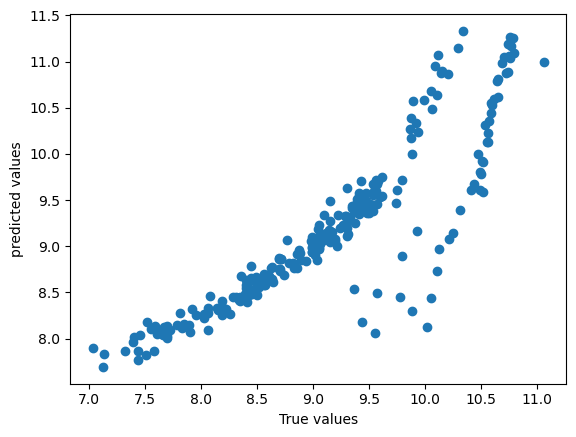

In [47]:
plt.scatter(y_test,lrpred)
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV


In [50]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
rd=Ridge()


In [51]:
dict1={"alpha":[.0001,.001,.01,.1,1]}
gsv=GridSearchCV(estimator=ls,param_grid=dict1)

In [52]:
gsv.fit(x_train,y_train)
print(gsv.best_params_)
print(gsv.best_score_)
print(gsv.best_estimator_.alpha)

{'alpha': 0.0001}
0.7581856020192939
0.0001


In [53]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
lspred=ls.predict(x_test)
lspred_train=ls.predict(x_train)
print("r2_score:", r2_score(y_test,lspred))
print("r2-score on training data:", r2_score(y_train,lspred_train)*100)
print("mean_squared_error:", mean_squared_error(y_test,lspred))
print("roor_mean_squared_error:", np.sqrt(mean_squared_error(y_test,lspred)))
print("mean_absolute_error:",mean_absolute_error(y_test,lspred))

r2_score: 0.7815922562412795
r2-score on training data: 76.34137412994771
mean_squared_error: 0.18132698533056898
roor_mean_squared_error: 0.425825064234797
mean_absolute_error: 0.2725705464196685


In [54]:
gsv=GridSearchCV(estimator=rd,param_grid=dict1)
gsv.fit(x_train,y_train)
print(gsv.best_params_)
print(gsv.best_score_)
print(gsv.best_estimator_.alpha)

{'alpha': 1}
0.7581870392726524
1


In [55]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rdpred=rd.predict(x_test)
rdpred_train=rd.predict(x_train)
print("r2_score:", r2_score(y_test,rdpred))
print("r2-score on training data:", r2_score(y_train,rdpred_train)*100)
print("mean_squared_error:", mean_squared_error(y_test,rdpred))
print("roor_mean_squared_error:", np.sqrt(mean_squared_error(y_test,rdpred)))
print("mean_absolute_error:",mean_absolute_error(y_test,rdpred))

r2_score: 0.7816386405887452
r2-score on training data: 76.34130842151178
mean_squared_error: 0.18128847600966425
roor_mean_squared_error: 0.42577984453196493
mean_absolute_error: 0.27269625131824066


In [56]:
ls.coef_


array([ 0.48474841, -0.04624649,  0.08076525,  0.12629251,  0.63618334,
       -0.06101022])

In [57]:
rd.coef_

array([ 0.48434946, -0.04626981,  0.08084871,  0.12630063,  0.63566185,
       -0.06106627])

In [58]:
lr.coef_

array([ 0.48483154, -0.04636113,  0.08087205,  0.12638167,  0.63629604,
       -0.06112594])

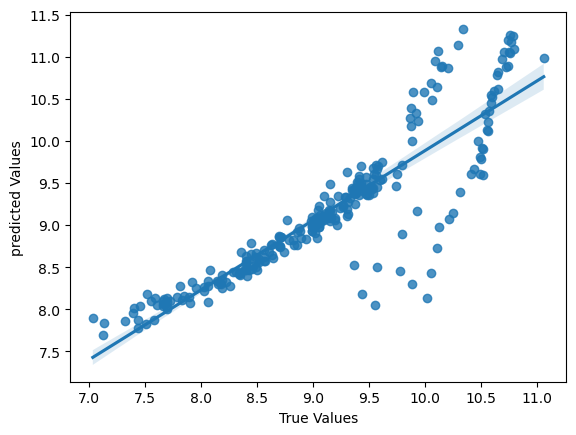

In [61]:
sns.regplot(y_test,rdpred)
plt.xlabel("True Values")
plt.ylabel("predicted Values")
plt.show()

In [62]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [63]:
svr=SVR()
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor()

In [64]:

dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
dtcpred_train=dtc.predict(x_train)
print("r2_score:", r2_score(y_test,dtcpred))
print("r2-score on training data:", r2_score(y_train,dtcpred_train)*100)
print("mean_squared_error:", mean_squared_error(y_test,dtcpred))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(y_test,dtcpred)))
print("mean_absolute_error:",mean_absolute_error(y_test,dtcpred))

r2_score: 0.7308000374363757
r2-score on training data: 99.7134370997939
mean_squared_error: 0.22349581943710284
root_mean_squared_error: 0.47275344465916147
mean_absolute_error: 0.213946439161368


In [65]:
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
knnpred_train=knn.predict(x_train)
print("r2_score:", r2_score(y_test,knnpred))
print("r2-score on training data:", r2_score(y_train,knnpred_train)*100)
print("mean_squared_error:", mean_squared_error(y_test,knnpred))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(y_test,knnpred)))
print("mean_absolute_error:",mean_absolute_error(y_test,knnpred))

r2_score: 0.8174732023710416
r2-score on training data: 86.09586612565992
mean_squared_error: 0.15153782272786462
root_mean_squared_error: 0.38927859269148696
mean_absolute_error: 0.22817923470297996


In [66]:
svm=SVR()
parameters={'kernel':['rbf','linear','poly'],'C':[1,10]}
gv=GridSearchCV(svm,parameters)
gv.fit(x_train,y_train)
print(gv.best_score_)
print(gv.best_estimator_)
print(gv.best_params_)

0.8237085413295023
SVR(C=1)
{'C': 1, 'kernel': 'rbf'}


by the hyper parametric tunning rbf is the best parameter

In [67]:
svm=SVR(kernel='rbf',C=1)
svm.fit(x_train,y_train)
svmpred=knn.predict(x_test)
svmpred_train=svm.predict(x_train)
print("r2_score:", r2_score(y_test,svmpred))
print("r2-score on training data:", r2_score(y_train,svmpred_train)*100)
print("mean_squared_error:", mean_squared_error(y_test,svmpred))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(y_test,svmpred)))
print("mean_absolute_error:",mean_absolute_error(y_test,svmpred))

r2_score: 0.8174732023710416
r2-score on training data: 83.82342002520079
mean_squared_error: 0.15153782272786462
root_mean_squared_error: 0.38927859269148696
mean_absolute_error: 0.22817923470297996


In [69]:
from sklearn.ensemble import RandomForestRegressor


In [70]:
forest=RandomForestRegressor()
forest.fit(x_train,y_train)
forestpred=forest.predict(x_test)
forestpred_train=forest.predict(x_train)
print("r2_score:", r2_score(y_test,forestpred))
print("r2-score on training data:", r2_score(y_train,forestpred_train)*100)
print("mean_squared_error:", mean_squared_error(y_test,forestpred))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(y_test,forestpred)))
print("mean_absolute_error:",mean_absolute_error(y_test,forestpred))


r2_score: 0.8340102814482064
r2-score on training data: 96.93592946173543
mean_squared_error: 0.13780837044915706
root_mean_squared_error: 0.3712254981128816
mean_absolute_error: 0.19405381593166618


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


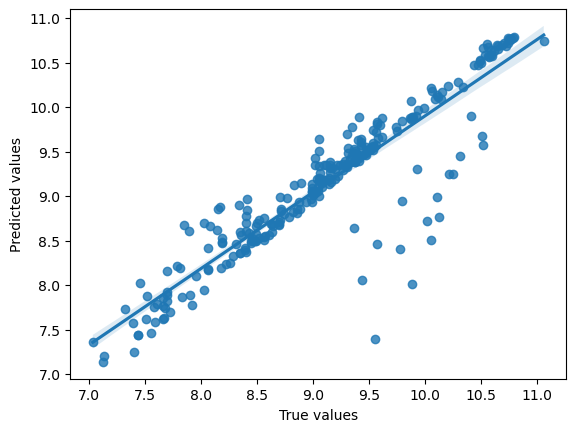

In [71]:
sns.regplot(y_test,forestpred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

In [72]:
from sklearn.ensemble import GradientBoostingRegressor


In [73]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbrpred=gbr.predict(x_test)
gbrpred_train=gbr.predict(x_train)
print("r2_score:", r2_score(y_test,gbrpred))
print("r2-score on training data:", r2_score(y_train,gbrpred_train)*100)
print("mean_squared_error:", mean_squared_error(y_test,gbrpred))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(y_test,gbrpred)))
print("mean_absolute_error:",mean_absolute_error(y_test,gbrpred))


r2_score: 0.8523861190815043
r2-score on training data: 88.32383677720243
mean_squared_error: 0.1225523397625763
root_mean_squared_error: 0.35007476310436364
mean_absolute_error: 0.1896980609757062


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


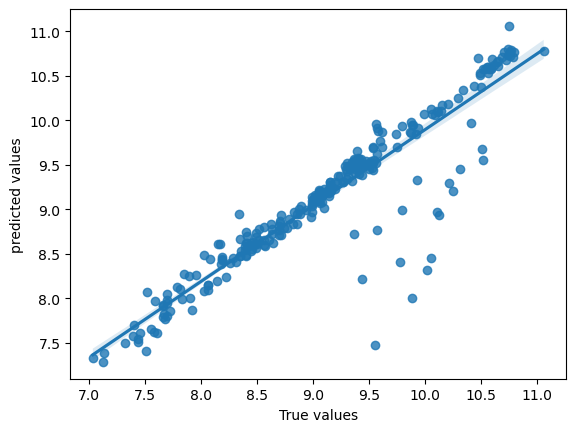

In [74]:
sns.regplot(y_test,gbrpred)
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

In [75]:
print("r2_score of dtc:",r2_score(y_test,dtcpred)),
print("r2_score of knn:",r2_score(y_test,knnpred)),
print("r2_score of linear regression:",r2_score(y_test,lrpred)),
print("r2_score of lasso:",r2_score(y_test,lspred)),
print("r2_score of ridge:",r2_score(y_test,rdpred)),
print("r2_score of svm:",r2_score(y_test,svmpred)),
print("r2_score of random forest regressor:",r2_score(y_test,forestpred)),
print("r2_score of Gradient boosting regressor:",r2_score(y_test,gbrpred)),

r2_score of dtc: 0.7308000374363757
r2_score of knn: 0.8174732023710416
r2_score of linear regression: 0.7815457419591416
r2_score of lasso: 0.7815922562412795
r2_score of ridge: 0.7816386405887452
r2_score of svm: 0.8174732023710416
r2_score of random forest regressor: 0.8340102814482064
r2_score of Gradient boosting regressor: 0.8523861190815043


(None,)

we can see from the obsevation performance of Gradient Boosting Regressor model is better in all of them

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
#apply cv score
score=cross_val_score(gbr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87217968 0.73278345 0.90199767 0.83969986 0.80506348]
0.8303448278176958
0.05853062469939379


In [78]:
score1=cross_val_score(forest,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

[0.85085779 0.70518627 0.85028432 0.81696439 0.79565685]
0.8037899247263688
0.05355279148500442


In [79]:
# save model
import pickle
filename='GradientBoostingRegressor.pkl'
pickle.dump(gbr,open(filename,'wb'))

load_model=pickle.load(open(filename,'rb'))
load_model.predict(x_test)

array([ 9.5146295 ,  7.92766855,  9.94081579,  7.76400429,  8.84140344,
        9.18451125,  8.7409899 ,  8.43055775,  7.87247942,  8.62370165,
        8.15035991,  9.48794663,  9.91846312,  9.26928377,  9.30723252,
        9.87328011,  7.66155303,  9.3331951 ,  9.76894989,  8.24509939,
        8.80331147,  8.54756394, 10.06718824,  9.47130381,  9.51158043,
        9.20753183,  8.77276444,  8.59483046,  9.09429066,  9.39992184,
        9.30989647,  8.71462307,  7.38794119,  9.31527724,  8.61901184,
        7.97942881,  9.2021763 ,  9.57156589,  8.41067489,  8.38178323,
       10.33888053,  7.61278522,  8.9715105 ,  9.51623268, 10.68282758,
        9.01078413,  7.94639346,  9.5042327 ,  9.10991131,  9.70211939,
        7.62358779,  7.70444589,  9.19019333,  8.56585582,  9.6597472 ,
        8.84091261, 10.7117931 ,  9.69748032, 10.09173302, 10.17124331,
        8.0475521 , 10.53672328, 10.77202183,  8.58890535,  9.12695543,
        9.11569841,  8.1081282 ,  9.21958954,  9.22869156,  9.45

In [80]:
conculusion=pd.DataFrame([load_model.predict(x_test)[:],(y_test)[:]],index=["Predicted","Original"])
conculusion

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
Predicted,9.514629,7.927669,9.940816,7.764004,8.841403,9.184511,8.740990,8.430558,7.872479,8.623702,...,8.608842,8.007381,10.614633,8.489766,9.206465,9.312009,8.262283,8.558241,9.691662,8.658909
Original,9.473643,7.663140,9.800012,7.676359,8.821136,9.054494,8.494947,8.187069,7.921180,8.411908,...,8.484170,7.904376,10.650439,8.403514,10.256568,9.195271,7.956980,8.459463,9.535644,8.517750


In [82]:
predicted=load_model.predict(x_test)[:]
original=(y_test)[:]

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


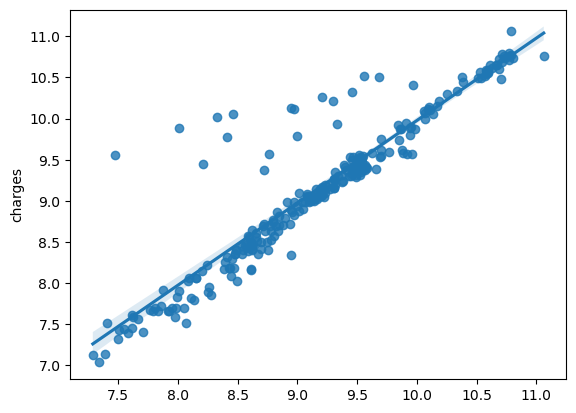

In [83]:
sns.regplot(predicted,original)
plt.show()